<a href="https://colab.research.google.com/github/pythonkvs/seminars/blob/main/comparison_libraries/ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

<h3>Data reshaping and sampling<h3>

In [ ]:
df = pd.read_csv("breast-cancer-wisconsin.csv", sep=';')
display(df.head())
print(len(df))       
        
for i in range(0, len(df)):
    if df.iat[i, 10] == 2:
        df.iat[i, 10] = 0
    else:
        df.iat[i, 10] = 1
        
for i in range(0, len(df)):
    if df.iat[i, 10] != 1 and df.iat[i, 10] != 0:
        print(df.iloc[i, 10])

ytrain = df["Column11"].to_numpy()

df = df.drop(["Column1", "Column7", "Column11"], axis=1)


xtrain = df.to_numpy()

xtrain, ytrain = shuffle(xtrain, ytrain, random_state=0)

feature_train, feature_test, target_train, target_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


699


,Column2,Column3,Column4,Column5,Column6,Column8,Column9,Column10
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


<h3> Model building<h3>

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(2, 2, 1), activation='logistic', solver='adam', max_iter=10000, random_state=1)

<h3> Model training<h3>

In [ ]:
model.fit(feature_train, target_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2, 1),
              max_iter=10000, random_state=1)

<h3> Model evaluation<h3>

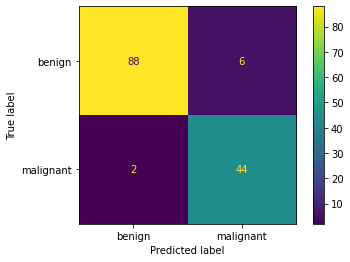

In [ ]:
#Prediction on test set
predictions = model.predict(feature_test)
class_names=["benign", "malignant"]
cm = confusion_matrix(target_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot() 